# **Introdução**



> A análise abaixo foi feita usando dados do site: https://www.sofascore.com/



> A motivação desta análise é buscar avaliar o desempenho do Corinthians no Brasileirão 2022, atentando-se principalmente aos dados ofensivos do time paulista. Isso pode ser importante para buscar entender quais os pontos fortes e fracos do time no quesito de ataque, o que consequentemente pode trazer insights para possíveis melhoras para um melhor desempenho do time em campeonatos futuros.



> **Perguntas que tentaremos responder com esta análise?**



*   A quantidade de gols marcados tem relação com o desempenho do clube no campeonato?
*   O fator casa tem influência no desempenho dos times?

*   O ***Corinthians*** cria muitas oportunidades?
*   O ***Corinthians*** tem eficácia ofensiva?

*   Os jogadores de ataque do ***Corinthians*** tiveram bom desempenho comparado a outras estrelas de clubes adversários?












# Downloads de bibliotecas para visualização de dados

In [ ]:
pip install pillow matplotlib mplcyberpunk numpy pandas scipy


# Imports de bibliotecas para visualização de dados

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import mplcyberpunk
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import pandas as pd
from scipy.stats import linregress


# Conectar com o Google Drive para acessar dados da planilha e imagens (Caso voce nao queira usar localmente)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataVIZ/teams_stats_brasileirao_2022.csv', index_col = 0)

# Gráfico de gols marcados

<ipython-input-77-63d6306b82c6>:27: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = brasoes[i].resize((brasao_height, brasao_height), Image.ANTIALIAS)  # Redimensionar a imagem para o tamanho desejado


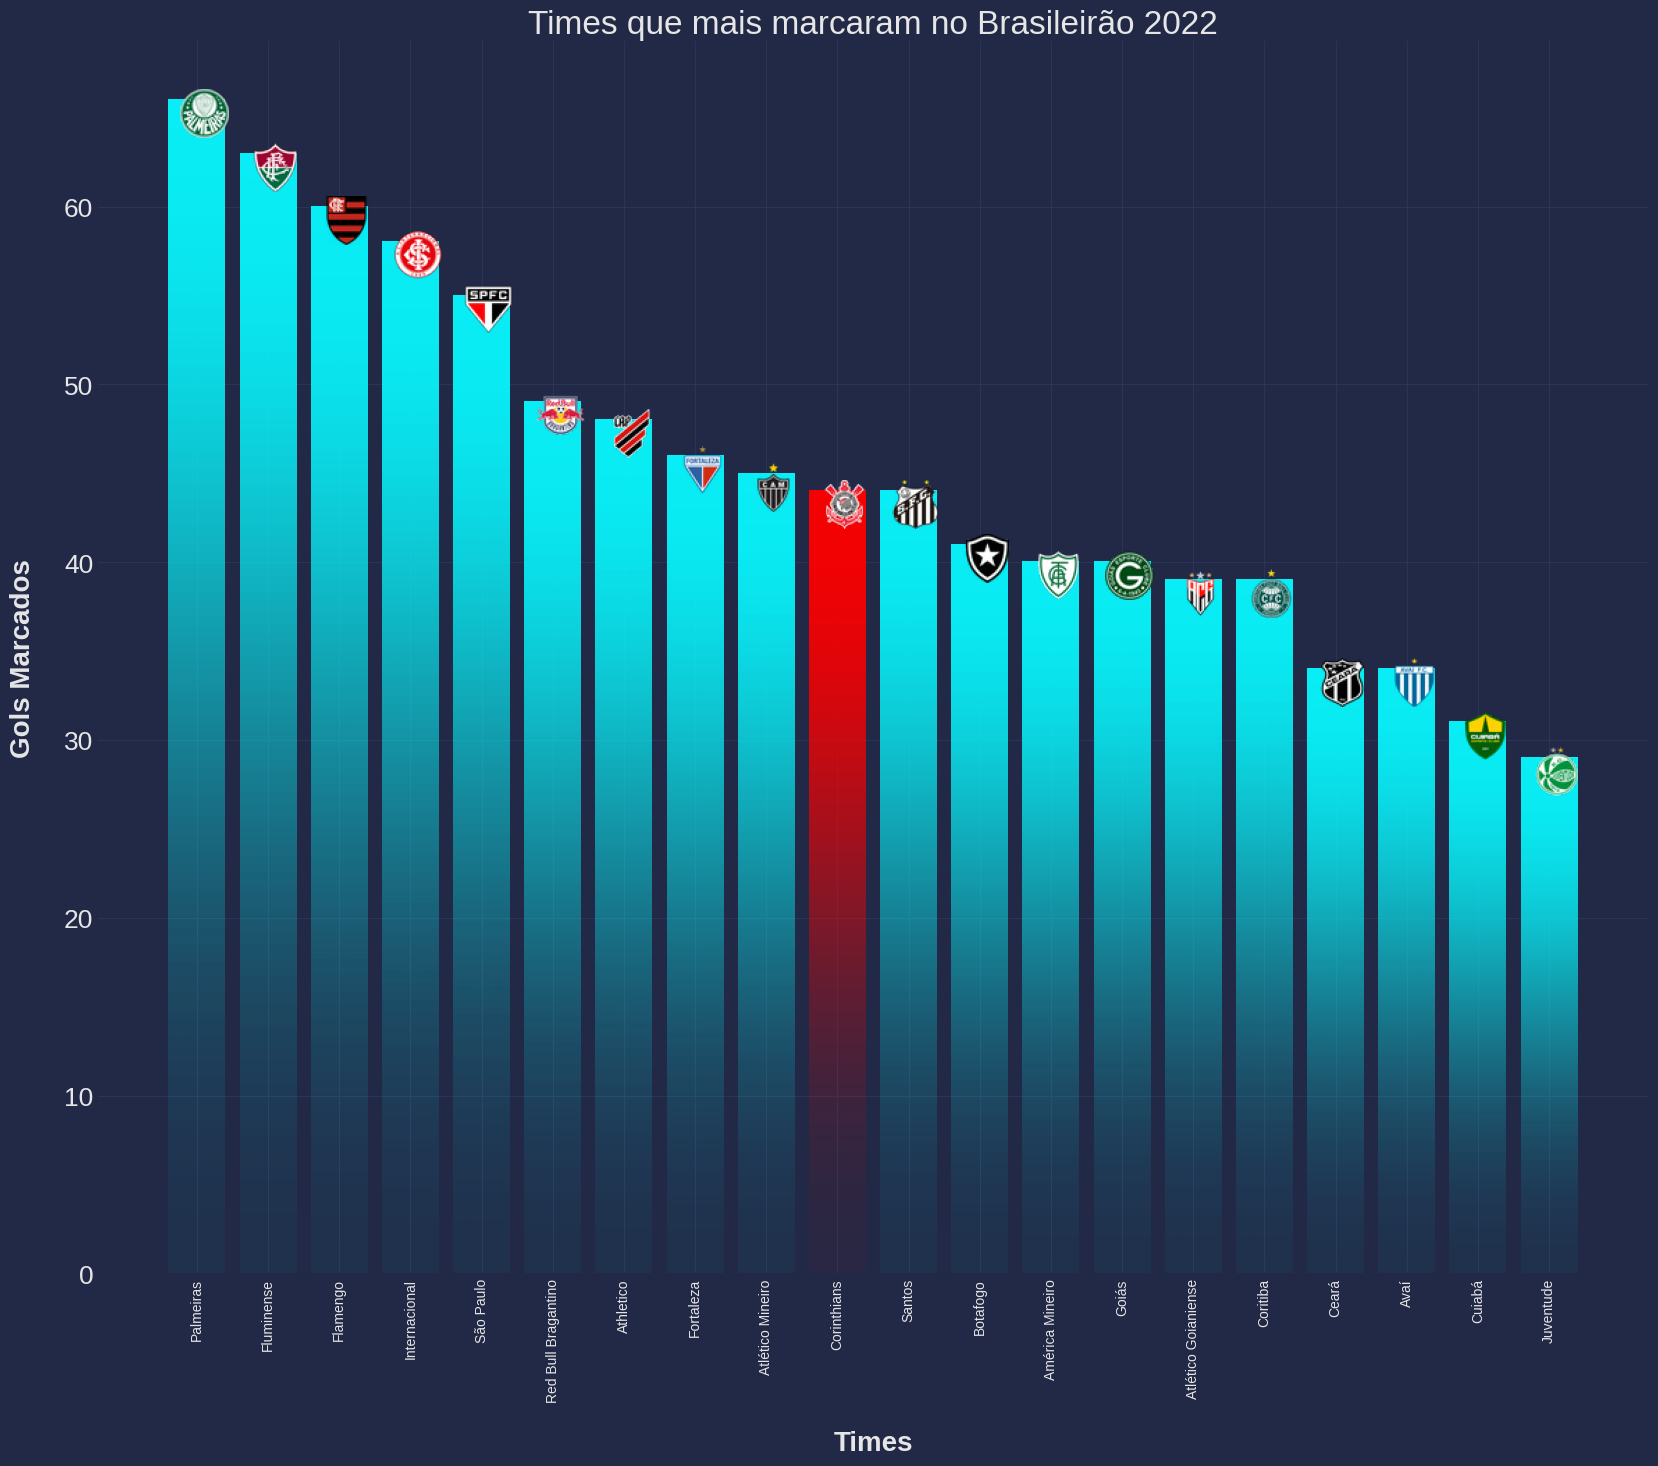

In [ ]:
plt.style.use('cyberpunk')

brasao_height = 35

goals_scored = df['goalsScored']

order = goals_scored.argsort()[::-1]

goals_scored = goals_scored.iloc[order]

team_names = goals_scored.index
goals = goals_scored.values

brasoes = []
for equipe in team_names:
    img = Image.open(f'/content/drive/MyDrive/DataVIZ/brasoes/{equipe}.png').convert('RGBA')
    brasoes.append(img)


plt.figure(figsize = (20,16))
colors = ['C10' if team == 'Corinthians' else 'C0' for team in team_names]
bars = plt.bar(team_names, goals, color = colors)
mplcyberpunk.add_bar_gradient(bars=bars)
_ = plt.xticks(rotation=90)

for i, value in enumerate(goals):
    img = brasoes[i].resize((brasao_height, brasao_height), Image.ANTIALIAS)  # Redimensionar a imagem para o tamanho desejado
    bar = bars[i]
    bar_x = bar.get_x()
    bar_y = bar.get_height()
    imagebox = OffsetImage(img, zoom=1)
    ab = AnnotationBbox(imagebox, (bar_x + 0.5, bar_y), frameon=False, xybox=(0, -10), xycoords='data', boxcoords="offset points", pad=0)
    plt.gca().add_artist(ab)

plt.xlabel('Times', fontsize= 20, fontweight= 'bold', labelpad=20)
plt.ylabel('Gols Marcados', fontsize= 20, fontweight= 'bold', labelpad=20)
plt.tick_params(axis='y', labelsize=19)
plt.title('Times que mais marcaram no Brasileirão 2022', fontsize=24, fontweight='regular')
plt.savefig("goalsScored.png")
plt.show()

# Gráfico de goal ratio

> Análise de quantos gols são feitos por cada gol levado por time no Brasileirão de 2022













<ipython-input-78-ca5a673f9d22>:26: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = brasoes[i].resize((brasao_height, brasao_height), Image.ANTIALIAS)  # Redimensionar a imagem para o tamanho desejado


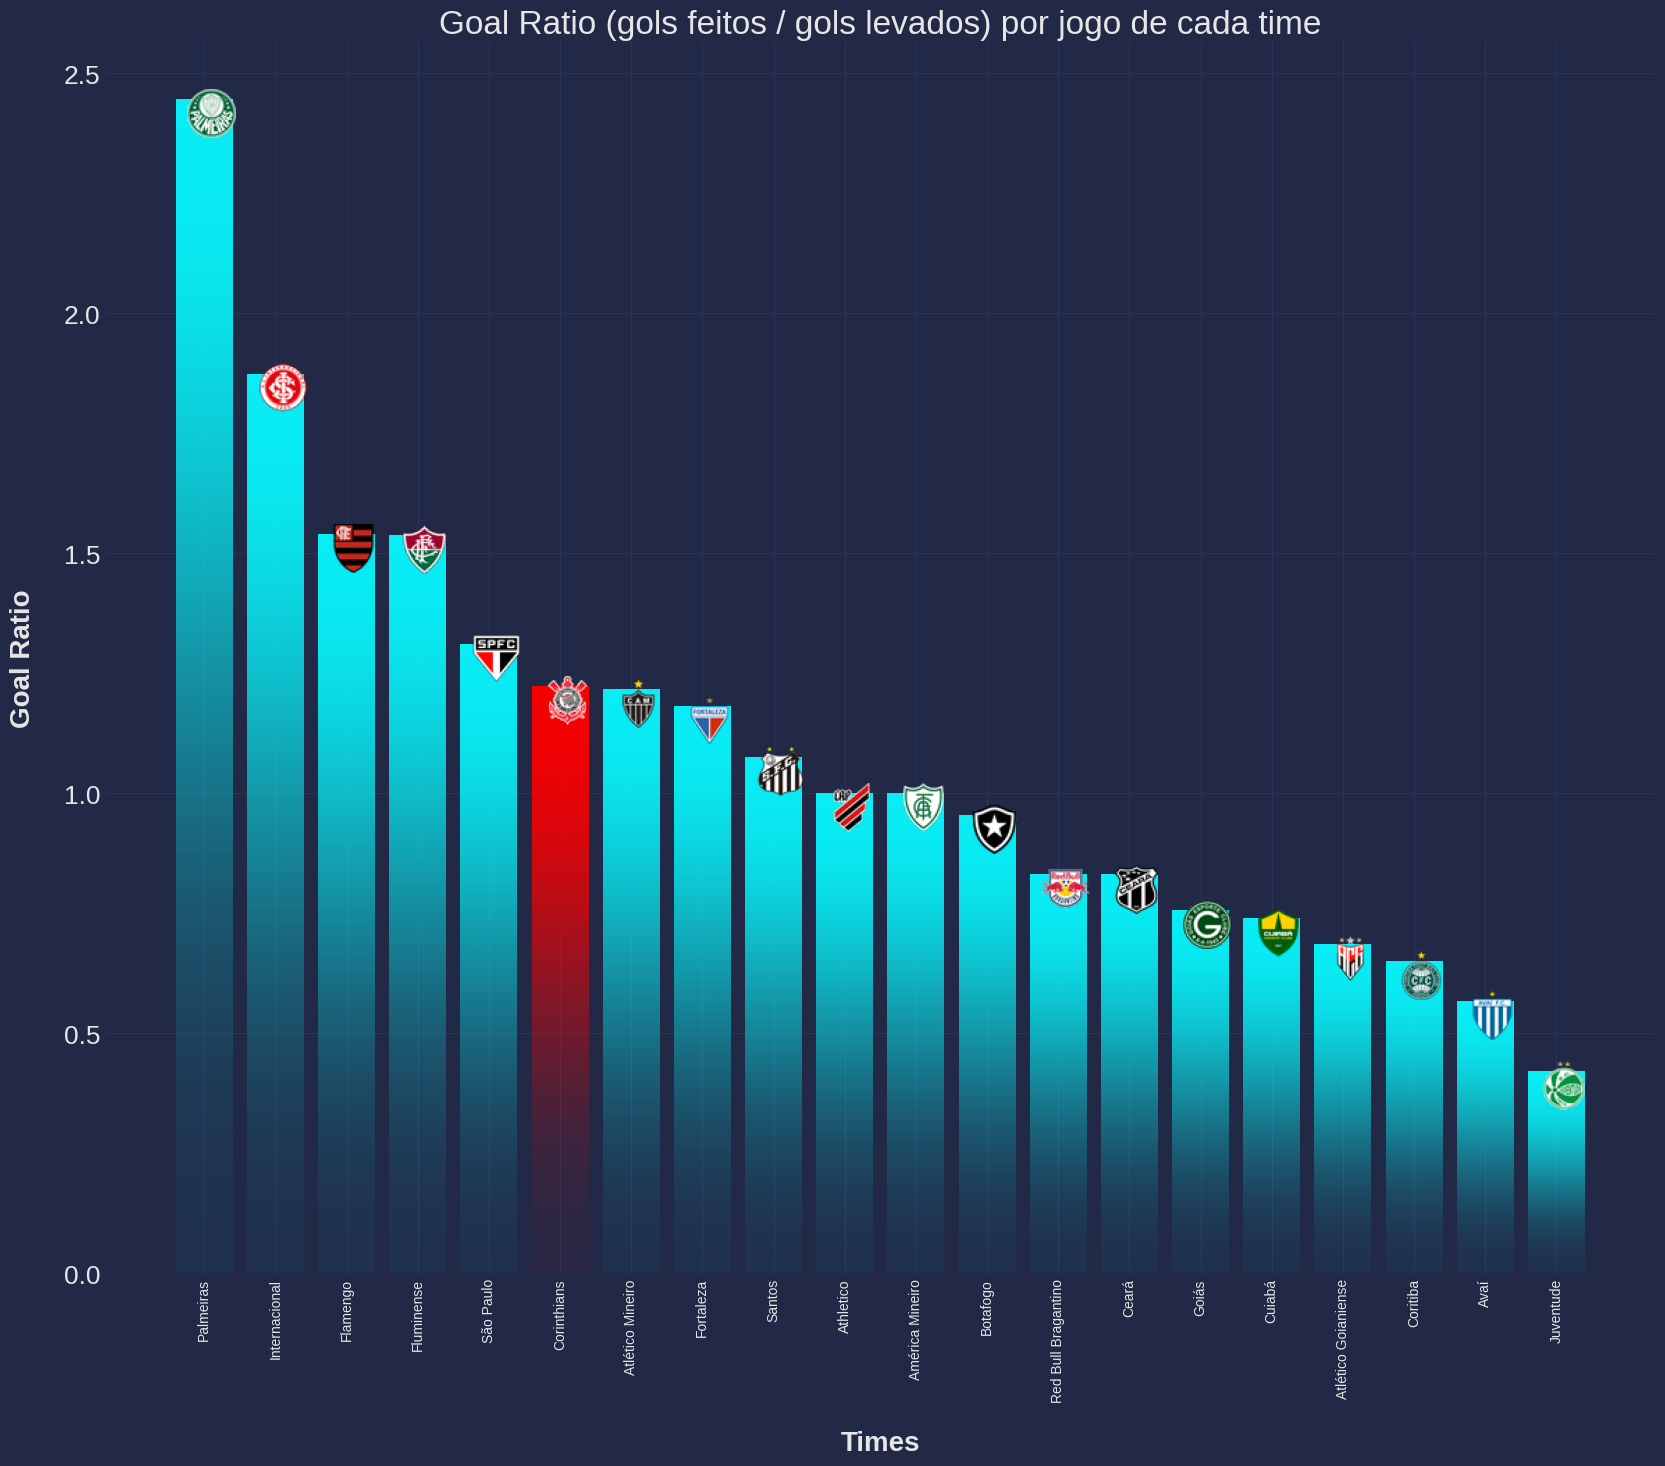

In [ ]:
plt.style.use('cyberpunk')

brasao_height = 35

goal_ratio = df['goalRatio']

order = goal_ratio.argsort()[::-1]

goal_ratio = goal_ratio.iloc[order]

team_names = goal_ratio.index
goals = goal_ratio.values

brasoes = []
for equipe in team_names:
    img = Image.open(f'/content/drive/MyDrive/DataVIZ/brasoes/{equipe}.png').convert('RGBA')
    brasoes.append(img)

plt.figure(figsize = (20,16))
colors = ['C10' if team == 'Corinthians' else 'C0' for team in team_names]
bars = plt.bar(team_names, goals, color = colors)
mplcyberpunk.add_bar_gradient(bars=bars)
_ = plt.xticks(rotation=90)

for i, value in enumerate(goals):
    img = brasoes[i].resize((brasao_height, brasao_height), Image.ANTIALIAS)  # Redimensionar a imagem para o tamanho desejado
    bar = bars[i]
    bar_x = bar.get_x()
    bar_y = bar.get_height()
    imagebox = OffsetImage(img, zoom=1)
    ab = AnnotationBbox(imagebox, (bar_x + 0.5, bar_y), frameon=False, xybox=(0, -10), xycoords='data', boxcoords="offset points", pad=0)
    plt.gca().add_artist(ab)


plt.xlabel('Times', fontsize= 20, fontweight= 'bold', labelpad=20)
plt.ylabel('Goal Ratio', fontsize= 20, fontweight= 'bold', labelpad=20)
plt.tick_params(axis='y', labelsize=19)
plt.title('Goal Ratio (gols feitos / gols levados) por jogo de cada time', fontsize=24, fontweight='regular')
plt.savefig("goalRatio.png")
plt.show()

# Análise deste gráfico


> O Palmeiras (campeão do brasileirão) se destaca como líder deste quesito mostrando sua eficiência tanto ofensivamente quanto defensivamente.



> O ***Corinthians*** aparece como o sexto colocado nesta métrica o que demonstra uma taxa de eficiência menor comparado aos times que figuraram o G-6 do campeonato neste ano.



> O Juventude amarga a última colocação desta métrica demonstrando uma eficiência baixíssima tanto ofensivamente quanto defensivamente. Coincidentemente, foi o último colocado do campeonato.



> Será que podemos buscar uma relação entre o *Goal Ratio* e as colocações dos times na tabela do Brasileirão 2022?

# Correlação entre colocação no campeonato (quantidade de pontos) e goal ratio(gols feitos / gols levados)



> Gráfico que demonstra a correlação forte positiva entre: a quantidade de pontos feitos por time no campeonato x a taxa de goals ratio (quantos gols um time faz para cada gol que leva)



Correlação entre goalRatio e points: 0.9237090573110256


<ipython-input-79-a1553a7569b9>:24: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = brasoes[i].resize((brasao_height, brasao_height), Image.ANTIALIAS)


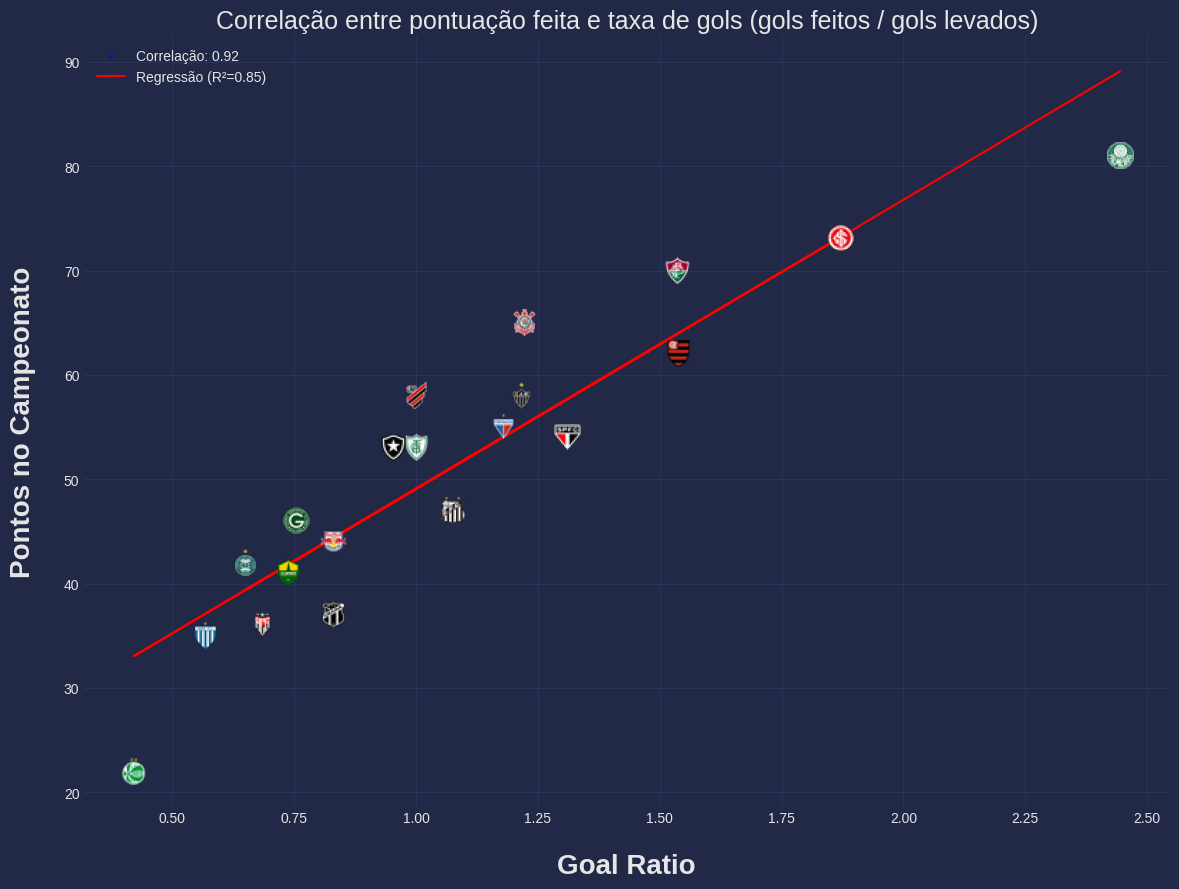

In [ ]:
goal_ratio = df['goalRatio']
points = df['Points']

correlacao = goal_ratio.corr(points)

print("Correlação entre goalRatio e points:", correlacao)

brasoes = []
brasao_height = 19
team_names = df.index


for equipe in team_names:
    img = Image.open(f'/content/drive/MyDrive/DataVIZ/brasoes/{equipe}.png').convert('RGBA')
    brasoes.append(img)

plt.figure(figsize=(14, 10))
plt.scatter(goal_ratio, points, label=f'Correlação: {correlacao:.2f}', color='b', s=1)

for i, team_name in enumerate(team_names):
    x = goal_ratio[i]
    y = points[i]

    img = brasoes[i].resize((brasao_height, brasao_height), Image.ANTIALIAS)
    imagebox = OffsetImage(img, zoom=1)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False, xybox=(0, 0), xycoords='data', boxcoords="offset points", pad=0)
    plt.gca().add_artist(ab)


ax = plt.gca()

slope, intercept, r_value, p_value, std_err = linregress(goal_ratio, points)
line = slope * goal_ratio + intercept


plt.plot(goal_ratio, line, color='r', label=f'Regressão (R²={r_value**2:.2f})')

plt.xlabel('Goal Ratio', fontsize= 20, fontweight= 'bold', labelpad=20)
plt.ylabel('Pontos no Campeonato', fontsize= 20, fontweight= 'bold', labelpad=20)
plt.title('Correlação entre pontuação feita e taxa de gols (gols feitos / gols levados)', fontsize=18, fontweight='regular')
plt.legend()
plt.grid(True)
plt.savefig("correlation.png")
plt.show()

# Análise desta correlação



> Esse gráfico demonstra uma forte correlação positiva entre as duas métricas. Portanto, pode-se relacionar o alto número de *goal ratio* com uma posição mais elevada na tabela do Brasileirão 2022.




> O Palmeiras figura-se como o time a ser batido por sua eficiência altissima tanto ofensivamente quanto no campo defensivo e configura-se como primeiro lugar nos dois aspectos (colocação no campeonato e goals ratio).



> O ***Corinthians*** apesar de estar atrás de 5 times no quesito *goal ratio* ainda aparece no g4 do Brasileirão e por que isso acontece? Provavelmente a força do Corinthians jogando dentro de casa foi o que fez o clube conquistar a maioria dos pontos possíveis em jogos com mando de campo. Esse fato, pode estar relacionado com a posição elevada do Corinthians na tabela apesar de ter um *goal ratio* mais baixo que os dos times do G6.



> O Juventude foi o lanterna do Campeonato e amargou essa última colocação por péssimos resultados, visto que tem o menor *goal ratio* entre os times do Brasileirão 2022.









    









# Importância do Fator Casa



> Esse gráfico irá analisar o desempenho dos clubes jogando em seu mando de campo.



<ipython-input-54-cfb2f24eee41>:29: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = brasoes[i].resize((brasao_height, brasao_height), Image.ANTIALIAS)


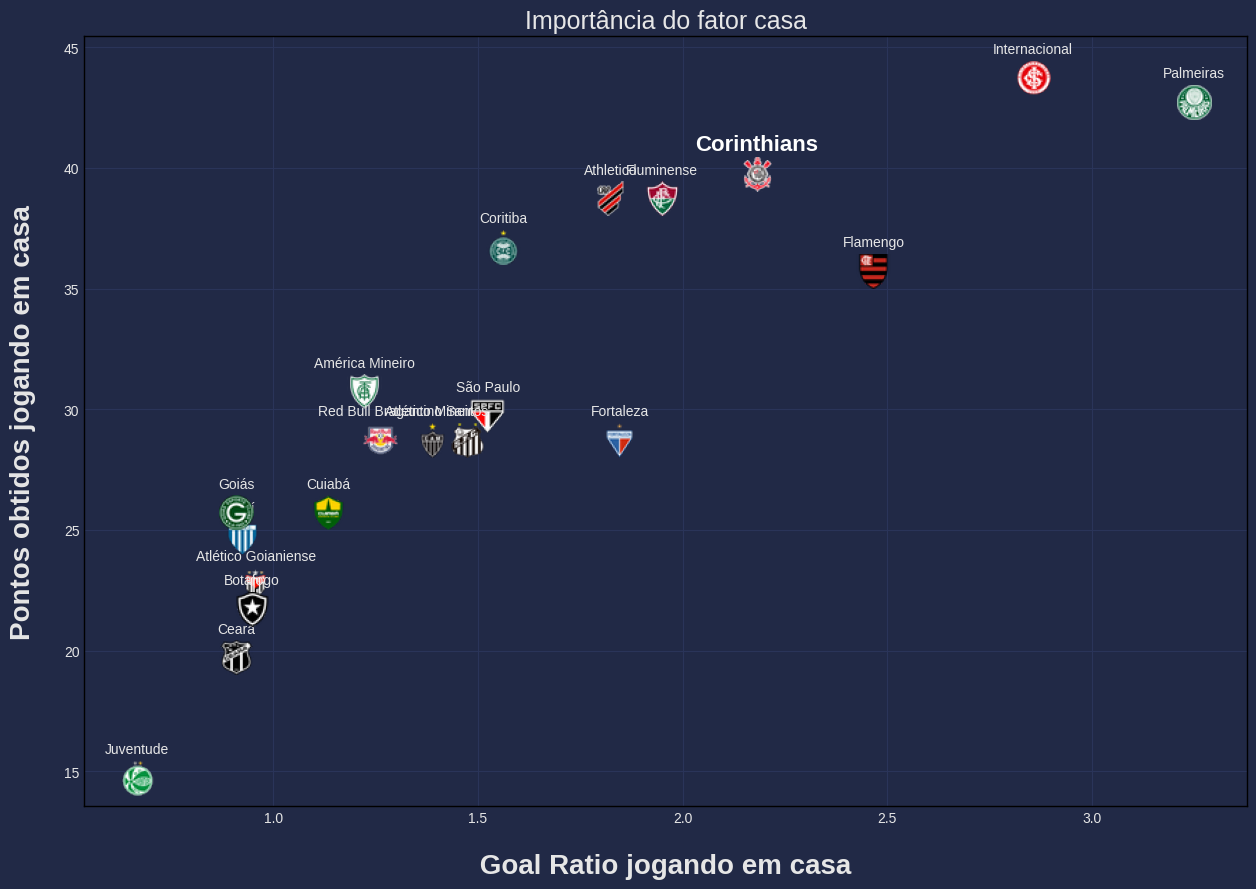

In [ ]:
plt.style.use("cyberpunk")

home_goal_ratio = df['homeGoalRatio']
home_points = df['homePoints']
team_names = df.index

brasoes = []
brasao_height = 25 # Altura do brasão (ajuste conforme necessário)


for equipe in team_names:
    img = Image.open(f'/content/drive/MyDrive/DataVIZ/brasoes/{equipe}.png').convert('RGBA')
    brasoes.append(img)


plt.figure(figsize=(15, 10))
plt.scatter(x = home_goal_ratio, y = home_points, s=1, c = 'white')


for i, team_name in enumerate(team_names):
    x = home_goal_ratio[i]
    y = home_points[i]

    if team_name == 'Corinthians':
        plt.annotate(team_name, (x, y), textcoords="offset points", xytext=(0, 13), ha='center', size=16, color='white', fontweight='bold')
    else:
        plt.annotate(team_name, (x, y), textcoords="offset points", xytext=(0, 13), ha='center', size=10)

    img = brasoes[i].resize((brasao_height, brasao_height), Image.ANTIALIAS)
    imagebox = OffsetImage(img, zoom=1)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False, xybox=(0, -5), xycoords='data', boxcoords="offset points", pad=0)
    plt.gca().add_artist(ab)



ax = plt.gca()

ax.spines['bottom'].set_linewidth(1.0)
ax.spines['left'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)


plt.xlabel(' Goal Ratio jogando em casa ', fontsize= 20, fontweight= 'bold', labelpad=20)
plt.ylabel('Pontos obtidos jogando em casa', fontsize= 20, fontweight= 'bold', labelpad=20)
plt.title('Importância do fator casa', fontsize=18, fontweight='regular')
plt.savefig("homegoals.png")
plt.show()

# Análise



> A partir dessa análise, pode-se perceber a eficiência do ***Corinthians*** jogando dentro de casa com o apoio de sua fiel torcida. O **timão** encontra-se como terceiro melhor mandante. Com isso, apesar do seu baixo *goal ratio* durante o campeonato comparado aos times do G6, o Corinthians dentro da Neo Química Arena tem um aproveitamento ótimo, o que contribuiu para manter o time entre os 4 melhores do Brasileirão  2022.



> Times com os melhores desempenhos dentro de casa figuraram-se em posições mais altas na tabela do Brasileirão 2022




# Avaliando o poder ofensivo do Corinthians comparado aos times do Brasileirão

<ipython-input-55-e5ba31e8ab07>:29: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = brasoes[i].resize((brasao_width, brasao_height), Image.ANTIALIAS)


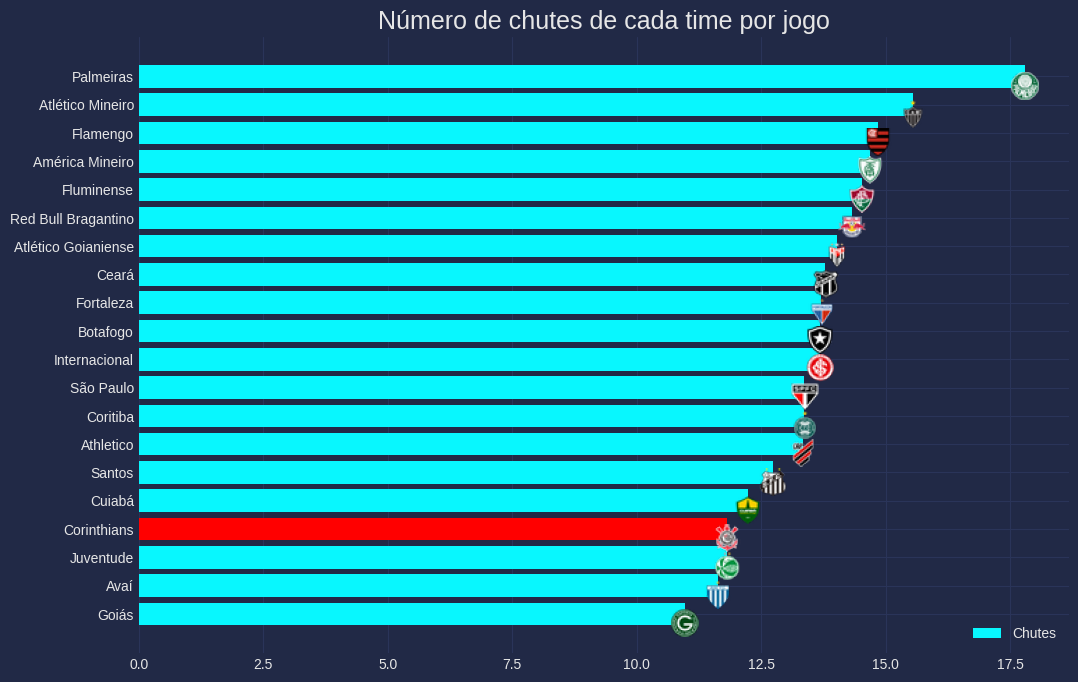

In [ ]:
plt.style.use('cyberpunk')

brasao_width = 20
brasao_height = 20

df = df.sort_values(by='shots', ascending=False)

number_of_matches = [38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38]

df['matches'] = number_of_matches

shots = df['shots'] / df['matches'] # chutes por jogo
team_names = df.index

brasoes = []
for equipe in team_names:
    img = Image.open(f'/content/drive/MyDrive/DataVIZ/brasoes/{equipe}.png').convert('RGBA')
    brasoes.append(img)


plt.figure(figsize = (12,8))
colors = ['C10' if team == 'Corinthians' else 'C0' for team in team_names]
bars = plt.barh(team_names, shots , label='Chutes', color = colors)
plt.legend(loc = 'lower right')
plt.gca().invert_yaxis()


for i, value in enumerate(shots):
    img = brasoes[i].resize((brasao_width, brasao_height), Image.ANTIALIAS)
    bar = bars[i]
    bar_x = bar.get_x() + bar.get_width()
    bar_y = bar.get_y() + bar.get_height() / 2
    imagebox = OffsetImage(img, zoom=1)
    ab = AnnotationBbox(imagebox, (bar_x, bar_y), frameon=False, xybox=(0, -brasao_height/3), xycoords='data', boxcoords="offset points", pad=0)
    plt.gca().add_artist(ab)


plt.title('Número de chutes de cada time por jogo', fontsize=18, fontweight='regular')
plt.savefig("shots.png")
plt.show()


# Análise



> O Corinthians encontra-se entre os 4 clubes que menos ameaçaram a meta adversária no quesito de chutes. Esse dado demonstra o fraco setor ofensivo do time paulista, o que escancara a dificuldade em criar jogadas e ter volume de jogo para criar oportunidades de gols.



# Correlação entre total de chances criadas e gols marcados

Correlação entre gols marcados e total de chances criadas: 0.8067242041422433


<ipython-input-43-e6deb1d5ceed>:24: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = brasoes[i].resize((brasao_height, brasao_height), Image.ANTIALIAS)


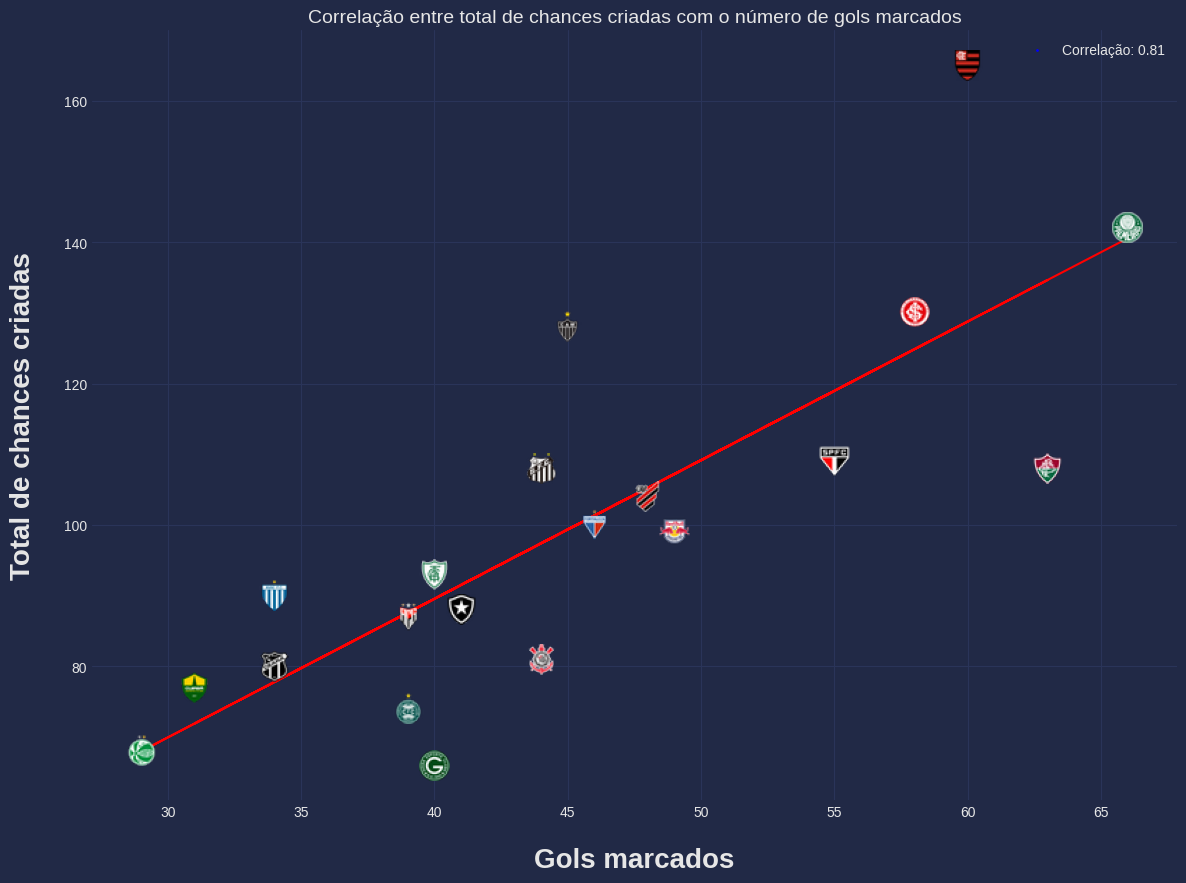

In [ ]:
gs = df['goalsScored']
tc = df['totalChances']

correlacao = gs.corr(tc)

print("Correlação entre gols marcados e total de chances criadas:", correlacao)

brasoes = []
brasao_height = 22
team_names = df.index


for equipe in team_names:
    img = Image.open(f'/content/drive/MyDrive/DataVIZ/brasoes/{equipe}.png').convert('RGBA')
    brasoes.append(img)

plt.figure(figsize=(14, 10))
plt.scatter(gs, tc, label=f'Correlação: {correlacao:.2f}', color='b', s=1)

for i, team_name in enumerate(team_names):
    x = gs[i]
    y = tc[i]

    img = brasoes[i].resize((brasao_height, brasao_height), Image.ANTIALIAS)
    imagebox = OffsetImage(img, zoom=1)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False, xybox=(0, 0), xycoords='data', boxcoords="offset points", pad=0)
    plt.gca().add_artist(ab)


ax = plt.gca()

slope, intercept, r_value, p_value, std_err = linregress(gs, tc)
line = slope * gs + intercept


plt.plot(gs, line, color='r', label=f'Regressão (R²={r_value**2:.2f})')

plt.xlabel('Gols marcados', fontsize= 20, fontweight= 'bold', labelpad=20)
plt.ylabel('Total de chances criadas', fontsize= 20, fontweight= 'bold', labelpad=20)
plt.title('Correlação entre total de chances criadas com o número de gols marcados', fontsize= 14)
plt.legend()
plt.grid(True)
plt.savefig("correlation122.png")
plt.show()

# Análise


> As variáveis chances criadas e gols marcados tem uma forte correlação positiva entre si. Ou seja, quanto mais chances de gols o time cria, mais gols são marcados. Com isso, dá para ter uma ideia da eficiência dos ataques dos times na hora de converter a oportunidade de gol em bola na rede.



> O ***Corinthians*** encontra-se longe dos times do G4 nesse gráfico, o que confirma ainda mais a ineficácia ofensiva em criar oportunidades. Visto que quanto menor o perigo que o time leva ao adversário, menor a taxa de gols feitos.






# Comparação entre jogadores

## Bibliotecas que irão ser usadas

In [ ]:
pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 2.0 MB/s eta 0:00:00


### Imports

In [ ]:
from mplsoccer import Radar, FontManager, grid

# Comparação German Cano x Yuri Alberto no Brasileirão 2022

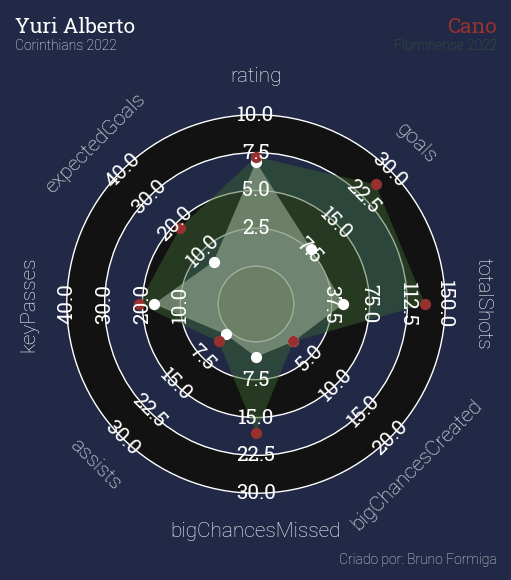

In [ ]:
yuri_values = pd.read_csv('/content/drive/MyDrive/DataVIZ/df_Yuri Alberto_stats.csv')
cano_values = pd.read_csv('/content/drive/MyDrive/DataVIZ/df_Cano_stats.csv')

goals_yuri = yuri_values['goals']
bigChancesCreated_yuri = yuri_values['bigChancesCreated']
bigChancesMissed_yuri = yuri_values['bigChancesMissed']
rating_yuri = yuri_values['rating']
keyPasses_yuri = yuri_values['keyPasses']
totalShots_yuri = yuri_values['totalShots']
expectedGoals_yuri = yuri_values['expectedGoals']
assists_yuri = yuri_values['assists']

goals_cano = cano_values['goals']
bigChancesCreated_cano = cano_values['bigChancesCreated']
bigChancesMissed_cano = cano_values['bigChancesMissed']
rating_cano = cano_values['rating']
keyPasses_cano = cano_values['keyPasses']
totalShots_cano = cano_values['totalShots']
expectedGoals_cano = cano_values['expectedGoals']
assists_cano = cano_values['assists']


params = ["rating", "goals", "totalShots", "bigChancesCreated", "bigChancesMissed", "assists", "keyPasses", "expectedGoals"]


low = [0, 0, 0, 0, 0, 0, 0, 0]
high = [10, 30, 150, 20, 30, 30, 40, 40]
lower_is_better = ['Miscontrol']

radar = Radar(params, low, high,
              lower_is_better=lower_is_better,

              round_int=[False]*len(params),
              num_rings=4,
              ring_width=1, center_circle_radius=1)

URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)

URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

text_color = 'white'
ya_values = [rating_yuri[0], goals_yuri[0], totalShots_yuri[0],  bigChancesCreated_yuri[0], bigChancesMissed_yuri[0], assists_yuri[0],  keyPasses_yuri[0], expectedGoals_yuri[0]]
cano_values = [rating_cano[0], goals_cano[0],  totalShots_cano[0], bigChancesCreated_cano[0], bigChancesMissed_cano[0], assists_cano[0], keyPasses_cano[0], expectedGoals_cano[0]]

fig, axs = grid(figheight=8, grid_height=0.615, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'], facecolor='None')  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#121212', edgecolor='#FFFFFF')
radar_output = radar.draw_radar_compare(ya_values, cano_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#FFFFFF', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#3a6332', 'alpha': 0.5})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_bold.prop, color = text_color)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop, color = text_color)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#FFFFFF', edgecolors='#FFFFFF', marker='o', s=50, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#973130', edgecolors='#973130', marker='o', s=50, zorder=2)


endnote_text = axs['endnote'].text(0.99, 0.5, 'Criado por: Bruno Formiga', fontsize=10,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Yuri Alberto', fontsize=15, color='#FFFFFF',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Corinthians 2022', fontsize=10,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#FFFFFF')
title3_text = axs['title'].text(0.99, 0.65, 'Cano', fontsize=15,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#973130')
title4_text = axs['title'].text(0.99, 0.25, 'Fluminense 2022', fontsize=10,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#3a6332')

fig.set_facecolor('#212946')
plt.savefig("radarYuriCano.png")

# Comparação entre Yuri Alberto x Hulk no Brasileirão 2022

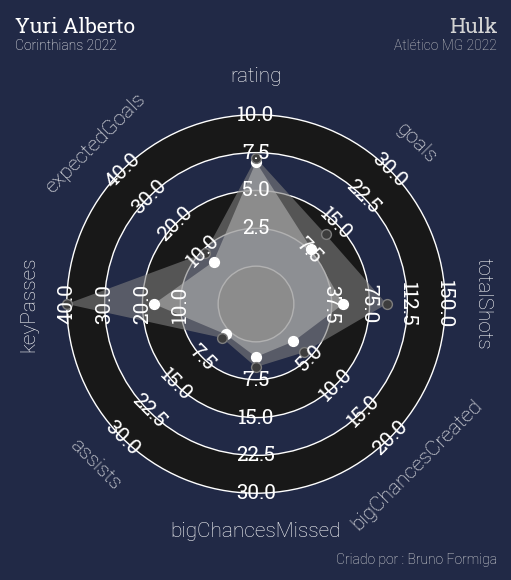

In [ ]:
yuri_values = pd.read_csv('/content/drive/MyDrive/DataVIZ/df_Yuri Alberto_stats.csv')
hulk_values = pd.read_csv('/content/drive/MyDrive/DataVIZ/df_Hulk_stats.csv')

goals_yuri = yuri_values['goals']
bigChancesCreated_yuri = yuri_values['bigChancesCreated']
bigChancesMissed_yuri = yuri_values['bigChancesMissed']
rating_yuri = yuri_values['rating']
keyPasses_yuri = yuri_values['keyPasses']
totalShots_yuri = yuri_values['totalShots']
expectedGoals_yuri = yuri_values['expectedGoals']
assists_yuri = yuri_values['assists']

goals_hulk = hulk_values['goals']
bigChancesCreated_hulk = hulk_values['bigChancesCreated']
bigChancesMissed_hulk = hulk_values['bigChancesMissed']
rating_hulk = hulk_values['rating']
keyPasses_hulk = hulk_values['keyPasses']
totalShots_hulk = hulk_values['totalShots']
expectedGoals_hulk = hulk_values['expectedGoals']
assists_hulk = hulk_values['assists']


params = ["rating", "goals", "totalShots", "bigChancesCreated", "bigChancesMissed", "assists", "keyPasses", "expectedGoals"]


low = [0, 0, 0, 0, 0, 0, 0, 0]
high = [10, 30, 150, 20, 30, 30, 40, 40]
lower_is_better = ['Miscontrol']

radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              round_int=[False]*len(params),
              num_rings=4,
              ring_width=1, center_circle_radius=1)

URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)

URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

text_color = 'white'
ya_values = [rating_yuri[0], goals_yuri[0], totalShots_yuri[0],  bigChancesCreated_yuri[0], bigChancesMissed_yuri[0], assists_yuri[0],  keyPasses_yuri[0], expectedGoals_yuri[0]]
hulk_values = [rating_hulk[0], goals_hulk[0],  totalShots_hulk[0], bigChancesCreated_hulk[0], bigChancesMissed_hulk[0], assists_hulk[0], keyPasses_hulk[0], expectedGoals_hulk[0]]

fig, axs = grid(figheight=8, grid_height=0.615, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'], facecolor='None')  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#181818', edgecolor='#FFFFFF')
radar_output = radar.draw_radar_compare(ya_values, hulk_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#FFFFFF', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#7E7E7E', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_bold.prop, color = text_color)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop, color = text_color)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#FFFFFF', edgecolors='#FFFFFF', marker='o', s=50, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#3D3D3D', edgecolors='#7E7E7E', marker='o', s=50, zorder=2)


endnote_text = axs['endnote'].text(0.99, 0.5, 'Criado por : Bruno Formiga', fontsize=10,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Yuri Alberto', fontsize=15, color='#FFFFFF',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Corinthians 2022', fontsize=10,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#FFFFFF')
title3_text = axs['title'].text(0.99, 0.65, 'Hulk', fontsize=15,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d3d3d3')
title4_text = axs['title'].text(0.99, 0.25, 'Atlético MG 2022', fontsize=10,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d3d3d3')

fig.set_facecolor('#212946')
plt.savefig("radarYuriHulk.png")

# Comparação entre Roger Guedes x Dudu no Brasileirão 2022

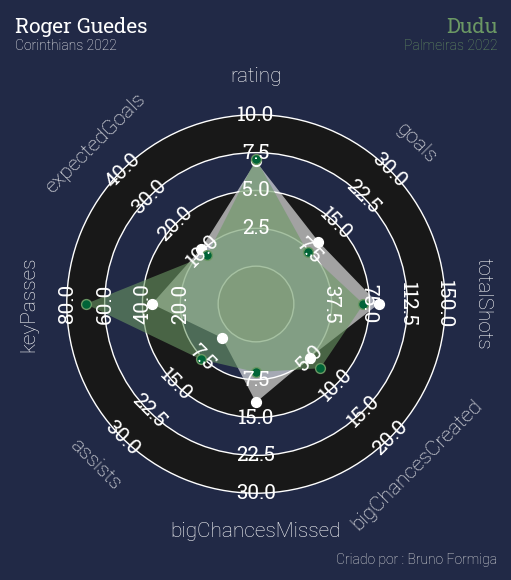

In [ ]:
guedes_values = pd.read_csv('/content/drive/MyDrive/DataVIZ/df_Roger Guedes_stats.csv')
dudu_values = pd.read_csv('/content/drive/MyDrive/DataVIZ/df_Dudu_stats.csv')

goals_guedes = guedes_values['goals']
bigChancesCreated_guedes = guedes_values['bigChancesCreated']
bigChancesMissed_guedes = guedes_values['bigChancesMissed']
rating_guedes = guedes_values['rating']
keyPasses_guedes = guedes_values['keyPasses']
totalShots_guedes = guedes_values['totalShots']
expectedGoals_guedes = guedes_values['expectedGoals']
assists_guedes = guedes_values['assists']

goals_dudu = dudu_values['goals']
bigChancesCreated_dudu = dudu_values['bigChancesCreated']
bigChancesMissed_dudu = dudu_values['bigChancesMissed']
rating_dudu = dudu_values['rating']
keyPasses_dudu = dudu_values['keyPasses']
totalShots_dudu = dudu_values['totalShots']
expectedGoals_dudu = dudu_values['expectedGoals']
assists_dudu = dudu_values['assists']


params = ["rating", "goals", "totalShots", "bigChancesCreated", "bigChancesMissed", "assists", "keyPasses", "expectedGoals"]


low = [0, 0, 0, 0, 0, 0, 0, 0]
high = [10, 30, 150, 20, 30, 30, 80, 40]
lower_is_better = ['Miscontrol']

radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              round_int=[False]*len(params),
              num_rings=4,
              ring_width=1, center_circle_radius=1)

URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)

URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

text_color = 'white'
ya_values = [rating_guedes[0], goals_guedes[0], totalShots_guedes[0],  bigChancesCreated_guedes[0], bigChancesMissed_guedes[0], assists_guedes[0],  keyPasses_guedes[0], expectedGoals_guedes[0]]
dudu_values = [rating_dudu[0], goals_dudu[0],  totalShots_dudu[0], bigChancesCreated_dudu[0], bigChancesMissed_dudu[0], assists_dudu[0], keyPasses_dudu[0], expectedGoals_dudu[0]]

fig, axs = grid(figheight=8, grid_height=0.615, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'], facecolor='None')  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#181818', edgecolor='#FFFFFF')
radar_output = radar.draw_radar_compare(ya_values, dudu_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#FFFFFF', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#6b9864', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_bold.prop, color = text_color)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop, color = text_color)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#FFFFFF', edgecolors='#FFFFFF', marker='o', s=50, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#006437', edgecolors='#6b9864', marker='o', s=50, zorder=2)


endnote_text = axs['endnote'].text(0.99, 0.5, 'Criado por : Bruno Formiga', fontsize=10,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Roger Guedes', fontsize=15, color='#FFFFFF',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Corinthians 2022', fontsize=10,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#FFFFFF')
title3_text = axs['title'].text(0.99, 0.65, 'Dudu', fontsize=15,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#6b9864')
title4_text = axs['title'].text(0.99, 0.25, 'Palmeiras 2022', fontsize=10,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#6b9864')

fig.set_facecolor('#212946')
plt.savefig("radarGuedesXdudu.png")